In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
## View the head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
## Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
## Check for null values
df.isnull().mean()

lat          0.000000
lng          0.000000
desc         0.000000
zip          0.120869
title        0.000000
timeStamp    0.000000
twp          0.000442
addr         0.000000
e            0.000000
dtype: float64

# Basic Questions

### What are the top 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

### What are the top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

### Take a look at the 'title' column, how many unique title codes are there?

In [8]:
df['title'].nunique()

148

# Creating New Features

In [9]:
titles = list(df['title'])

In [10]:
reason = []

for i in range(len(titles)):
    reason.append(titles[i][:titles[i].index(':')])

df['Reason'] = reason

### What is the most common Reason for 911 Calls?

In [11]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### Countplot of Reasons

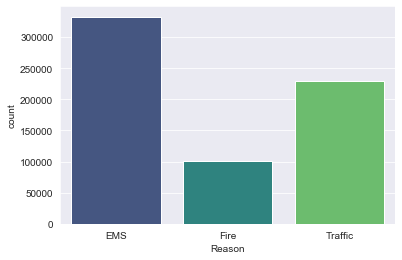

In [12]:
sns.set_style('darkgrid')
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

### Convert timestamp to datetime

In [13]:
df['timeStamp'][0]

'2015-12-10 17:10:52'

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
times = list(df['timeStamp'])

In [17]:
year = []
month = []
day_of_week = []
hour = []
for i in range(len(times)):
    year.append(times[i].year)
    month.append(times[i].month)
    day_of_week.append(times[i].dayofweek)
    hour.append(times[i].hour)
    
df['year'] = year
df['month'] = month
df['day_of_week'] = day_of_week
df['hour'] = hour

In [18]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}

In [19]:
df['day_of_week'] = df['day_of_week'].map(dmap)

### Countplot of Day of Week by Reason

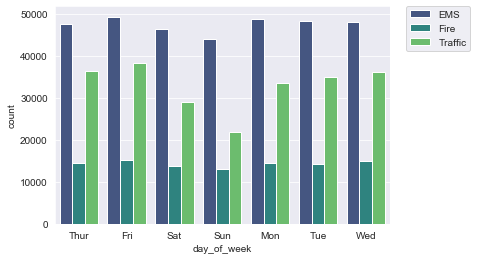

In [20]:
sns.countplot(x = 'day_of_week', hue = 'Reason', data = df, palette = 'viridis')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

### Countplot of Month by Reason

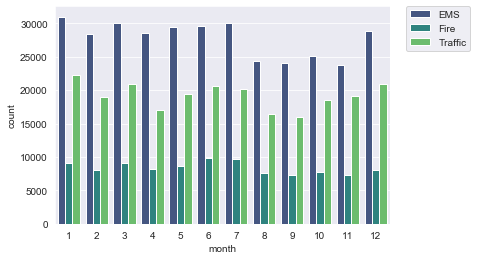

In [21]:
sns.countplot(x = 'month', hue = 'Reason', data = df, palette = 'viridis')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

In [22]:
t = df['timeStamp'][0]

In [23]:
df['date'] = df['timeStamp'].apply(lambda t:t.date())

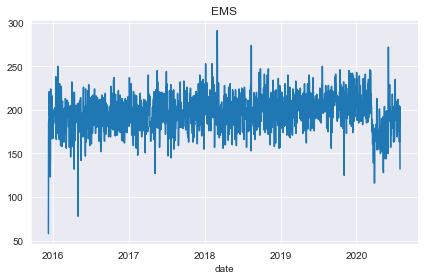

In [24]:
df[df['Reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

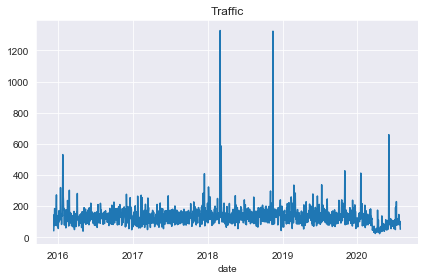

In [25]:
df[df['Reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

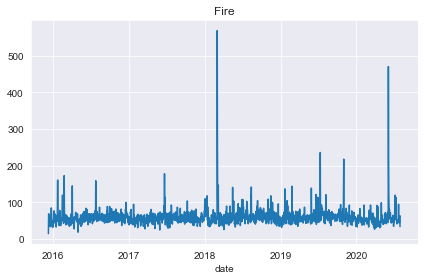

In [26]:
df[df['Reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

# Heatmap of No of Calls

In [27]:
dayHour = df.groupby(['day_of_week', 'hour'])['Reason'].count().unstack()

In [28]:
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thur,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


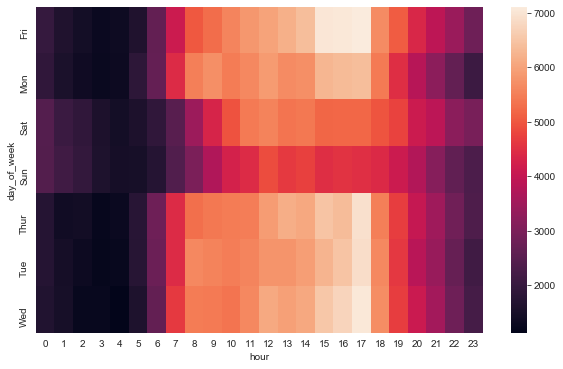

In [29]:
plt.figure(figsize = (10,6))
sns.heatmap(dayHour)

In [30]:
dayMonth = df.groupby(['day_of_week', 'month'])['Reason'].count().unstack()

In [31]:
dayMonth

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thur,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


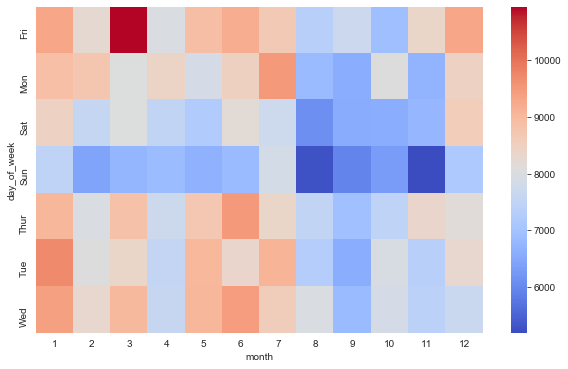

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(dayMonth, cmap = 'coolwarm')